In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.optim import Adam

# Visualization tools
import torchvision
from torchvision.datasets import MNIST
import torchvision.transforms.v2 as transforms
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.cuda.is_available()

True

In [3]:
train_set = torchvision.datasets.MNIST("./data/", train=True, download=True)
valid_set = torchvision.datasets.MNIST("./data/", train=False, download=True)

In [21]:
# extract first image then transfrom into tensor
x_0, y_0 = train_set[0]
to3tensor = transforms.Compose([transforms.ToImage(), transforms.ToDtype(torch.float32, scale=True)])  # PIL -> C H W
x_0_tensor = to3tensor(x_0)

In [ ]:

x_0_gpu = x_0_tensor.cuda()
# Compute tensor with GPU (if device is GPU)
x_0_tensor.to(device).device

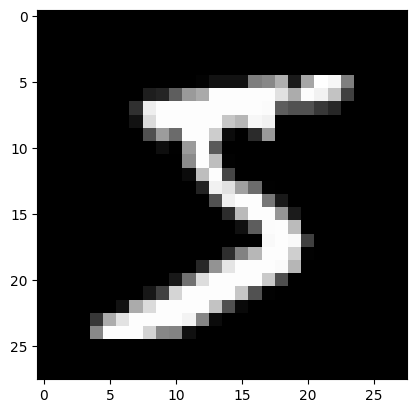

In [6]:
# convert tensor to PIL image
image = F.to_pil_image(x_0_tensor)
plt.imshow(image, cmap='gray')

In [7]:
# transform entire dataset
train_set.transform = to3tensor
valid_set.transform = to3tensor

In [8]:
batch_size = 32

# DataLoader defines how images are batched and shuffled for training
train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(valid_set, batch_size=batch_size)

In [23]:
layer_size = 512
layers = [
    nn.Flatten(),  # flatten the input tensor to a 1D vector
    nn.Linear(x_0_tensor.numel(), layer_size),  # input layer to hidden layer Linear(input size, output neurons)
    nn.ReLU(),  # activation function
    nn.Linear(layer_size, layer_size),  # hidden layer to hidden layer
    nn.ReLU(),  # activation function
    nn.Linear(layer_size, 10),  # hidden layer to output layer (10 classes for MNIST)
]

In [10]:
model = nn.Sequential(*layers)  # create a sequential model with the defined layers
model.to(device)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [11]:

# Compile with torch for performance optimization
model.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=512, bias=True)
  (2): ReLU()
  (3): Linear(in_features=512, out_features=512, bias=True)
  (4): ReLU()
  (5): Linear(in_features=512, out_features=10, bias=True)
)

In [12]:

# loss function for classification in a group of classes
loss_function = nn.CrossEntropyLoss()

# optimizer for updating model weights
# Adam optimizer is a popular choice for training deep learning models
optimizer = Adam(model.parameters())

In [13]:
# Number of training and validation samples
train_N = len(train_loader.dataset)
valid_N = len(valid_loader.dataset)

In [14]:
# Function to calculate accuracy for a batch
def get_batch_accuracy(output, y, N):
    pred = output.argmax(dim=1, keepdim=True)
    correct = pred.eq(y.view_as(pred)).sum().item()
    return correct / N

In [15]:

# Function to train the model
def train():
    loss = 0
    accuracy = 0

    model.train()
    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        output = model(x)
        optimizer.zero_grad()
        batch_loss = loss_function(output, y)
        batch_loss.backward()
        optimizer.step()

        loss += batch_loss.item()
        accuracy += get_batch_accuracy(output, y, train_N)
    print('Train - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))



In [16]:
# Function to validate the model 
def validate():
    loss = 0
    accuracy = 0

    model.eval()
    with torch.no_grad():
        for x, y in valid_loader:
            x, y = x.to(device), y.to(device)
            output = model(x)

            loss += loss_function(output, y).item()
            accuracy += get_batch_accuracy(output, y, valid_N)
    print('Valid - Loss: {:.4f} Accuracy: {:.4f}'.format(loss, accuracy))

In [17]:
epochs = 5

for epoch in range(epochs):
    print('Epoch: {}'.format(epoch))
    train()
    validate()

Epoch: 0
Train - Loss: 380.6356 Accuracy: 0.9381
Valid - Loss: 35.1291 Accuracy: 0.9655
Epoch: 1
Train - Loss: 160.3418 Accuracy: 0.9737
Valid - Loss: 27.0526 Accuracy: 0.9741
Epoch: 2
Train - Loss: 110.0874 Accuracy: 0.9816
Valid - Loss: 26.1327 Accuracy: 0.9745
Epoch: 3
Train - Loss: 80.7660 Accuracy: 0.9863
Valid - Loss: 24.2706 Accuracy: 0.9774
Epoch: 4
Train - Loss: 64.1695 Accuracy: 0.9889
Valid - Loss: 24.2850 Accuracy: 0.9797


In [19]:
prediction = model(x_0_gpu)
prediction

tensor([[-29.1475,  -7.6220, -14.7679,  13.2505, -24.7927,  16.3872, -29.4608,
         -18.2246, -16.3493,  -7.0028]], device='cuda:0',
       grad_fn=<AddmmBackward0>)

In [20]:


prediction.argmax(dim=1, keepdim=True)
y_0

5